# <b>Abstract<b>

This notebook presents a comparative analysis of response times for two HuggingSpace libraries: Transformers and spaCy

<b>Transformers</b>


Three prominent tokenization models, BERT, OpenAI GPT-3, and XLM-RoBERTa are used to assess their encoding and decoding response times when confronted with both batched and unbatched data, while utilizing two distinct datasets, prompt.txt and glassdoor-reviews.txt

The BERT is using wordpiece tokenization method.
The openAI GPT-3 model is using BPE tokenization method
The XLM-RoBERTa is using SentencePiece tokenization method

The first dataset ,prompts.txt is of medium size, comprises sentences of relatively uniform length. In contrast, the second dataset, larger in scale, presents a diverse landscape of text entries.
    
    
<b>SpaCy</b>


fill in spacy info here


We will perform analysis on the Transformers library first followed by the spaCy library

# <b>Transformers<b>

<h3><b>Install necessary packages and retrieve necessary datasets<h3></b>

In [16]:
!git clone https://github.com/pureskill714/ICT3102-assignment1.git
!pip install transformers
!pip install SentencePiece
import cProfile
import pandas as pd
import matplotlib.pyplot as plt
import time
from transformers import AutoTokenizer
from transformers import OpenAIGPTTokenizer
from transformers import XLMRobertaTokenizer

fatal: destination path 'ICT3102-assignment1' already exists and is not an empty directory.


<h3><b>Specify the tokenizer models to be used<h3></b>

In [17]:
tokenizer_bert = AutoTokenizer.from_pretrained("bert-base-uncased") # BERT is using wordpiece tokenization method
tokenizer_openai = OpenAIGPTTokenizer.from_pretrained("openai-gpt") # openai-gpt is using BPE tokenization.
tokenizer_xlmroberta = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base") # XLM-RoBERTa is using SentencePiece tokenization a

ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.


<h3><b>Store the entries of the datasets in a list<h3>

In [18]:
file_path = '/content/ICT3102-assignment1/prompts.txt'
prompts_lines = []

file_path2 = '/content/ICT3102-assignment1/glassdoor-reviews.txt'
glassdoor_lines = []

with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        prompts_lines.append(line.strip())

with open(file_path2, 'r', encoding='utf-8') as file:
    for line in file:
        glassdoor_lines.append(line.strip())

<h3><b>Comparision of encoding batched data using prompts.txt dataset<h3>

Response time for encoding batched data with BERT tokenization model: 0.05739712715148926 seconds
Response time for encoding batched data with openAI tokenization model: 0.4909393787384033 seconds
Response time for encoding batched data with XLMRoberta tokenization model: 0.08325600624084473 seconds


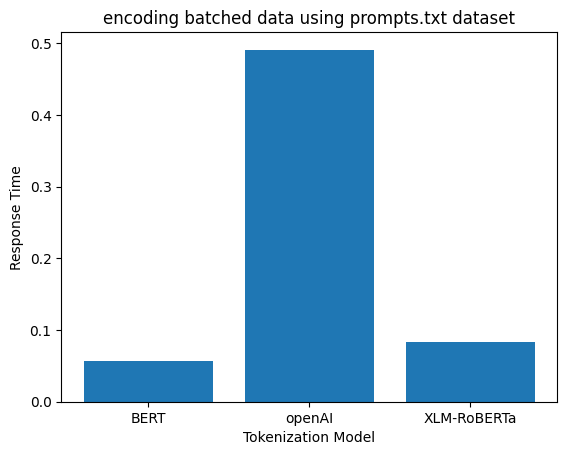

In [19]:
# Encoding batched data with BERT model
start_time_bert = time.time()
tokenized_sentences_bert = tokenizer_bert.batch_encode_plus(prompts_lines, add_special_tokens=True)
end_time_bert = time.time()
response_time_bert = end_time_bert - start_time_bert

# Encoding batched data with openAI model
start_time_openai = time.time()
tokenized_sentences_openai = tokenizer_openai.batch_encode_plus(prompts_lines, add_special_tokens=True)
end_time_openai = time.time()
response_time_openai = end_time_openai - start_time_openai

# Encoding batched data with XLM-RoBERTa model
start_time_xlmroberta = time.time()
tokenized_sentences_xlmroberta = tokenizer_xlmroberta.batch_encode_plus(prompts_lines, add_special_tokens=True)
end_time_xlmroberta = time.time()
response_time_xlmroberta = end_time_xlmroberta - start_time_xlmroberta

print(f"Response time for encoding batched data with BERT tokenization model: {response_time_bert} seconds")
print(f"Response time for encoding batched data with openAI tokenization model: {response_time_openai} seconds")
print(f"Response time for encoding batched data with XLMRoberta tokenization model: {response_time_xlmroberta} seconds")

models = ['BERT', 'openAI', 'XLM-RoBERTa']
response_times = [response_time_bert, response_time_openai, response_time_xlmroberta]
plt.bar(models, response_times)
plt.xlabel('Tokenization Model')
plt.ylabel('Response Time')
plt.title('encoding batched data using prompts.txt dataset')
plt.show()

<h3><b>Comparision of encoding batched data using glassdoor-reviews.txt dataset<h3>

Response time for encoding batched data with BERT tokenization model: 0.6425783634185791 seconds
Response time for encoding batched data with openAI tokenization model: 5.276628494262695 seconds
Response time for encoding batched data with XLMRoberta tokenization model: 2.1036934852600098 seconds


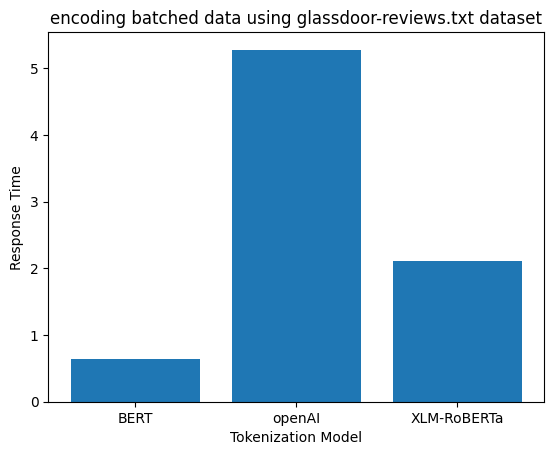

In [34]:
# Encoding batched data with BERT model
start_time_bert = time.time()
tokenized_sentences_bert = tokenizer_bert.batch_encode_plus(glassdoor_lines, add_special_tokens=True)
end_time_bert = time.time()
response_time_bert = end_time_bert - start_time_bert

# Encoding batched data with openAI model
start_time_openai = time.time()
tokenized_sentences_openai = tokenizer_openai.batch_encode_plus(glassdoor_lines, add_special_tokens=True)
end_time_openai = time.time()
response_time_openai = end_time_openai - start_time_openai

# Encoding batched data with XLM-RoBERTa model
start_time_xlmroberta = time.time()
tokenized_sentences_xlmroberta = tokenizer_xlmroberta.batch_encode_plus(glassdoor_lines, add_special_tokens=True)
end_time_xlmroberta = time.time()
response_time_xlmroberta = end_time_xlmroberta - start_time_xlmroberta


print(f"Response time for encoding batched data with BERT tokenization model: {response_time_bert} seconds")
print(f"Response time for encoding batched data with openAI tokenization model: {response_time_openai} seconds")
print(f"Response time for encoding batched data with XLMRoberta tokenization model: {response_time_xlmroberta} seconds")

models = ['BERT', 'openAI', 'XLM-RoBERTa']
response_times = [response_time_bert, response_time_openai, response_time_xlmroberta]
plt.bar(models, response_times)
plt.xlabel('Tokenization Model')
plt.ylabel('Response Time')
plt.title('encoding batched data using glassdoor-reviews.txt dataset')
plt.show()

<h3><b>Comparision of decoding batched data using prompts.txt dataset<h3>

Response time for detokenizing batched data with BERT tokenization model: 0.330172061920166 seconds
Response time for detokenizing batched data with openAI tokenization model: 0.35679101943969727 seconds
Response time for detokenizing unbatched data with XLMRoberta tokenization model: 0.5350527763366699 seconds


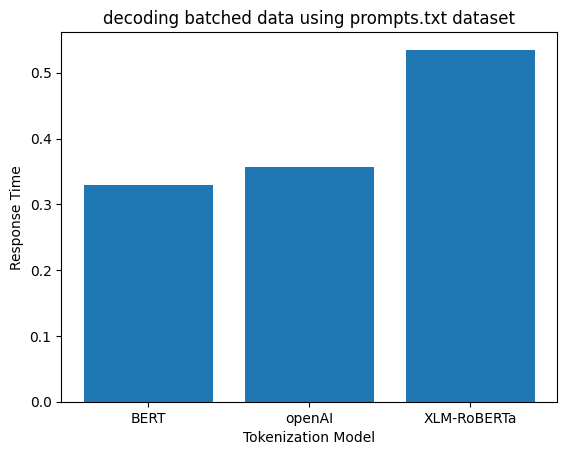

In [37]:
tokenized_sentences_bert = tokenizer_bert.batch_encode_plus(prompts_lines, add_special_tokens=True)
tokenized_sentences_openai = tokenizer_openai.batch_encode_plus(prompts_lines, add_special_tokens=True)
tokenized_sentences_xlmroberta = tokenizer_xlmroberta.batch_encode_plus(prompts_lines, add_special_tokens=True)

ids_bert = list(tokenized_sentences_bert["input_ids"]) # Store the tokenized IDs(Bert tokenization method) in a list
ids_openai = list(tokenized_sentences_openai["input_ids"]) # Store the tokenized IDs(openai tokenization method) in a list
ids_xlmroberta = list(tokenized_sentences_xlmroberta["input_ids"]) # Store the tokenized IDs(XLM-RoBERTa tokenization method) in a list


# Decoding batched data with BERT model
start_time_bert = time.time()
detokenized_sentences_bert = tokenizer_bert.batch_decode(ids_bert)
end_time_bert = time.time()
#print(detokenized_sentences_bert)
response_time_bert = end_time_bert - start_time_bert

# Decoding batched data with openAI model
start_time_openai = time.time()
detokenized_sentences_openai = tokenizer_openai.batch_decode(ids_openai)
end_time_openai = time.time()
#print(detokenized_sentences_openai)
response_time_openai = end_time_openai - start_time_openai

# Decoding batched data with XLM-RoBERTa model
start_time_xlmroberta = time.time()
detokenized_sentences_xlmroberta = tokenizer_xlmroberta.batch_decode(ids_xlmroberta)
end_time_xlmroberta = time.time()
response_time_xlmroberta = end_time_xlmroberta - start_time_xlmroberta

print(f"Response time for detokenizing batched data with BERT tokenization model: {response_time_bert} seconds")
print(f"Response time for detokenizing batched data with openAI tokenization model: {response_time_openai} seconds")
print(f"Response time for detokenizing unbatched data with XLMRoberta tokenization model: {response_time_xlmroberta} seconds")

models = ['BERT', 'openAI', 'XLM-RoBERTa']
response_times = [response_time_bert, response_time_openai, response_time_xlmroberta]
plt.bar(models, response_times)
plt.xlabel('Tokenization Model')
plt.ylabel('Response Time')
plt.title('decoding batched data using prompts.txt dataset')
plt.show()

<h3><b>Comparision of decoding batched data using glassdoor-reviews.txt dataset<h3>

Response time for detokenizing batched data with BERT tokenization model: 1.9804205894470215 seconds
Response time for detokenizing batched data with openAI tokenization model: 1.8097949028015137 seconds
Response time for detokenizing unbatched data with XLMRoberta tokenization model: 2.3270339965820312 seconds


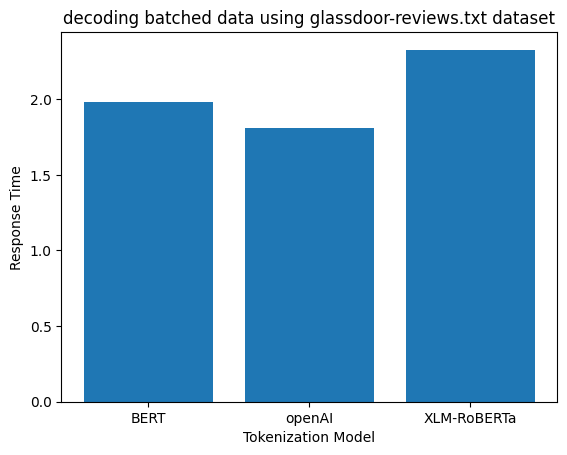

In [22]:
tokenized_sentences_bert = tokenizer_bert.batch_encode_plus(glassdoor_lines, add_special_tokens=True)
tokenized_sentences_openai = tokenizer_openai.batch_encode_plus(glassdoor_lines, add_special_tokens=True)
tokenized_sentences_xlmroberta = tokenizer_xlmroberta.batch_encode_plus(glassdoor_lines, add_special_tokens=True)

ids_bert = list(tokenized_sentences_bert["input_ids"]) # Store the tokenized IDs(Bert tokenization method) in a list
ids_openai = list(tokenized_sentences_openai["input_ids"]) # Store the tokenized IDs(openai tokenization method) in a list
ids_xlmroberta = list(tokenized_sentences_xlmroberta["input_ids"]) # Store the tokenized IDs(XLM-RoBERTa tokenization method) in a list


# Encoding batched data with BERT model
start_time_bert = time.time()
detokenized_sentences_bert = tokenizer_bert.batch_decode(ids_bert)
end_time_bert = time.time()
#print(detokenized_sentences_bert)
response_time_bert = end_time_bert - start_time_bert

# Encoding batched data with openAI model
start_time_openai = time.time()
detokenized_sentences_openai = tokenizer_openai.batch_decode(ids_openai)
end_time_openai = time.time()
#print(detokenized_sentences_openai)
response_time_openai = end_time_openai - start_time_openai

# Encoding batched data with XLM-RoBERTa model
start_time_xlmroberta = time.time()
detokenized_sentences_xlmroberta = tokenizer_xlmroberta.batch_decode(ids_xlmroberta)
end_time_xlmroberta = time.time()
response_time_xlmroberta = end_time_xlmroberta - start_time_xlmroberta

print(f"Response time for detokenizing batched data with BERT tokenization model: {response_time_bert} seconds")
print(f"Response time for detokenizing batched data with openAI tokenization model: {response_time_openai} seconds")
print(f"Response time for detokenizing unbatched data with XLMRoberta tokenization model: {response_time_xlmroberta} seconds")

models = ['BERT', 'openAI', 'XLM-RoBERTa']
response_times = [response_time_bert, response_time_openai, response_time_xlmroberta]
plt.bar(models, response_times)
plt.xlabel('Tokenization Model')
plt.ylabel('Response Time')
plt.title('decoding batched data using glassdoor-reviews.txt dataset')
plt.show()

<h3><b>Comparision of encoding unbatched data using prompts.txt dataset<h3>

Response time for encoding unbatched data with BERT tokenization model: 0.06937050819396973 seconds
Response time for encoding unbatched data with openAI tokenization model: 0.3124210834503174 seconds
Response time for encoding unbatched data with XLMRoberta tokenization model: 0.08844637870788574 seconds


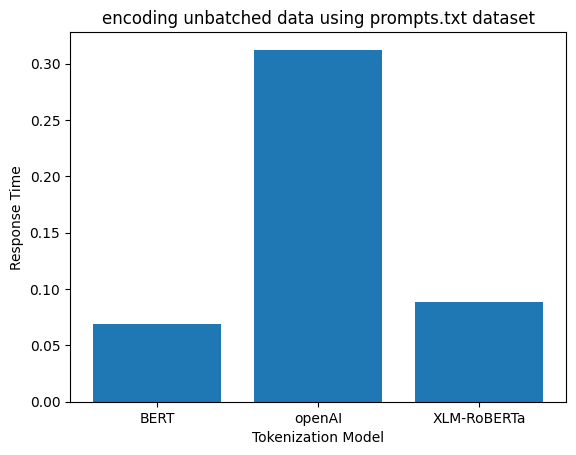

In [23]:
# Encoding unbatched data with BERT model
start_time_bert = time.time()
for element in prompts_lines:
    encoding_unbatched_bert = tokenizer_bert.encode_plus(element, add_special_tokens=True, truncation=True)
end_time_bert = time.time()
response_time_bert = end_time_bert - start_time_bert

# Encoding unbatched data with openAI model
start_time_openai = time.time()
for element in prompts_lines:
    encoding_unbatched_openai = tokenizer_openai.encode_plus(element, add_special_tokens=True, truncation=True)
end_time_openai = time.time()
response_time_openai = end_time_openai - start_time_openai

# Encoding unbatched data with XLM-RoBERTa model
start_time_xlmroberta = time.time()
for element in prompts_lines:
    encoding_unbatched = tokenizer_xlmroberta.encode_plus(element, add_special_tokens=True, truncation=True)
end_time_xlmroberta = time.time()
response_time_xlmroberta = end_time_xlmroberta - start_time_xlmroberta


print(f"Response time for encoding unbatched data with BERT tokenization model: {response_time_bert} seconds")
print(f"Response time for encoding unbatched data with openAI tokenization model: {response_time_openai} seconds")
print(f"Response time for encoding unbatched data with XLMRoberta tokenization model: {response_time_xlmroberta} seconds")

models = ['BERT', 'openAI', 'XLM-RoBERTa']
response_times = [response_time_bert, response_time_openai, response_time_xlmroberta]
plt.bar(models, response_times)
plt.xlabel('Tokenization Model')
plt.ylabel('Response Time')
plt.title('encoding unbatched data using prompts.txt dataset')
plt.show()

<h3><b>Comparision of encoding unbatched data using glassdoor-reviews.txt dataset<h3>

Response time for encoding unbatched data with BERT tokenization model: 1.0194261074066162 seconds
Response time for encoding unbatched data with openAI tokenization model: 8.982166528701782 seconds
Response time for encoding unbatched data with XLMRoberta tokenization model: 4.012274742126465 seconds


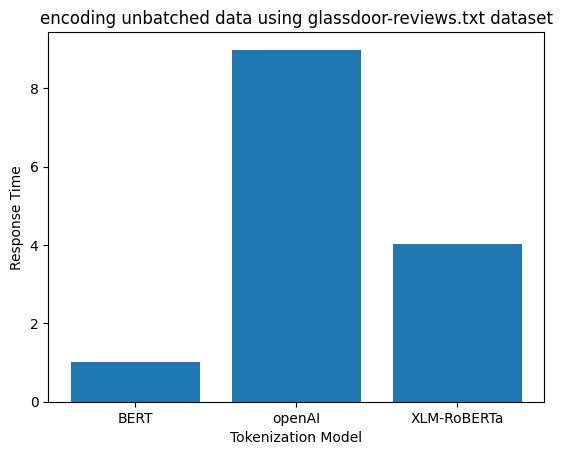

In [35]:
# Encoding unbatched data with BERT model
start_time_bert = time.time()
for element in glassdoor_lines:
    encoding_unbatched_bert = tokenizer_bert.encode_plus(element, add_special_tokens=True, truncation=True)
end_time_bert = time.time()
response_time_bert = end_time_bert - start_time_bert

# Encoding unbatched data with openAI model
start_time_openai = time.time()
for element in glassdoor_lines:
    encoding_unbatched_openai = tokenizer_openai.encode_plus(element, add_special_tokens=True, truncation=True)
end_time_openai = time.time()
response_time_openai = end_time_openai - start_time_openai

# Encoding unbatched data with XLM-RoBERTa model
start_time_xlmroberta = time.time()
for element in glassdoor_lines:
    encoding_unbatched = tokenizer_xlmroberta.encode_plus(element, add_special_tokens=True, truncation=True)
end_time_xlmroberta = time.time()
response_time_xlmroberta = end_time_xlmroberta - start_time_xlmroberta


print(f"Response time for encoding unbatched data with BERT tokenization model: {response_time_bert} seconds")
print(f"Response time for encoding unbatched data with openAI tokenization model: {response_time_openai} seconds")
print(f"Response time for encoding unbatched data with XLMRoberta tokenization model: {response_time_xlmroberta} seconds")

models = ['BERT', 'openAI', 'XLM-RoBERTa']
response_times = [response_time_bert, response_time_openai, response_time_xlmroberta]
plt.bar(models, response_times)
plt.xlabel('Tokenization Model')
plt.ylabel('Response Time')
plt.title('encoding unbatched data using glassdoor-reviews.txt dataset')
plt.show()

<h3><b>Comparision of decoding unbatched data using prompts.txt dataset<h3>

Response time for detokenizing unbatched data with BERT tokenization model: 0.23760128021240234 seconds
Response time for detokenizing unbatched data with openAI tokenization model: 0.5153110027313232 seconds
Response time for detokenizing unbatched data with XLMRoberta tokenization model: 0.7035975456237793 seconds


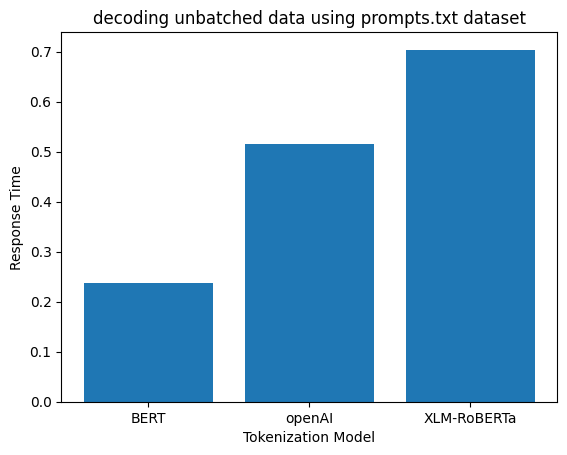

In [39]:
tokenized_sentences_bert = tokenizer_bert.batch_encode_plus(prompts_lines, add_special_tokens=True)
tokenized_sentences_openai = tokenizer_openai.batch_encode_plus(prompts_lines, add_special_tokens=True)
tokenized_sentences_xlmroberta = tokenizer_xlmroberta.batch_encode_plus(prompts_lines, add_special_tokens=True)

ids_bert = list(tokenized_sentences_bert["input_ids"]) # Store the tokenized IDs(Bert tokenization method) in a list
ids_openai = list(tokenized_sentences_openai["input_ids"]) # Store the tokenized IDs(openai tokenization method) in a list
ids_xlmroberta = list(tokenized_sentences_xlmroberta["input_ids"]) # Store the tokenized IDs(XLM-RoBERTa tokenization method) in a list

start_time_bert = time.time()
for element in ids_bert:
    detokenized_sentence_bert = tokenizer_bert.decode(element, skip_special_tokens=True)
    #print(detokenized_sentence_bert)
end_time_bert = time.time()
response_time_bert = end_time_bert - start_time_bert

start_time_openai = time.time()
for element in ids_openai:
    detokenized_sentence_openai = tokenizer_openai.decode(element, skip_special_tokens=True)
    #print(detokenized_sentence_openai)
end_time_openai = time.time()
response_time_openai = end_time_openai - start_time_openai


start_time_xlmroberta = time.time()
for element in ids_xlmroberta:
    detokenized_sentences_xlmroberta = tokenizer_xlmroberta.decode(element, skip_special_tokens=True)
    #print(detokenized_sentences_xlmroberta)
end_time_xlmroberta = time.time()
response_time_xlmroberta = end_time_xlmroberta - start_time_xlmroberta


print(f"Response time for detokenizing unbatched data with BERT tokenization model: {response_time_bert} seconds")
print(f"Response time for detokenizing unbatched data with openAI tokenization model: {response_time_openai} seconds")
print(f"Response time for detokenizing unbatched data with XLMRoberta tokenization model: {response_time_xlmroberta} seconds")

models = ['BERT', 'openAI', 'XLM-RoBERTa']
response_times = [response_time_bert, response_time_openai, response_time_xlmroberta]
plt.bar(models, response_times)
plt.xlabel('Tokenization Model')
plt.ylabel('Response Time')
plt.title('decoding unbatched data using prompts.txt dataset')
plt.show()

<h3><b>Comparision of decoding unbatched data using glassdoor.txt dataset<h3>

Response time for detokenizing unbatched data with BERT tokenization model: 3.027766466140747 seconds
Response time for detokenizing unbatched data with openAI tokenization model: 4.362295389175415 seconds
Response time for detokenizing unbatched data with XLMRoberta tokenization model: 12.102362632751465 seconds


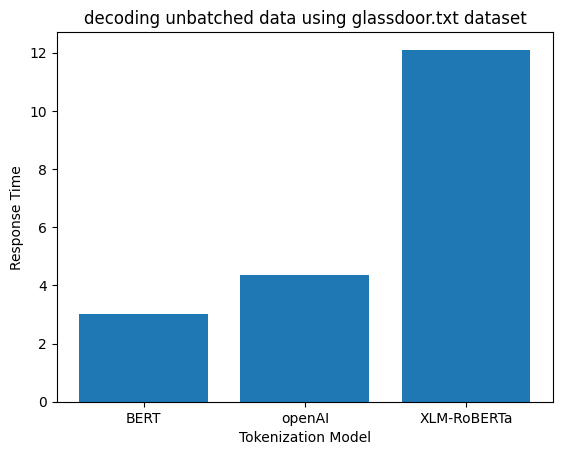

In [41]:
tokenized_sentences_bert = tokenizer_bert.batch_encode_plus(glassdoor_lines, add_special_tokens=True)
tokenized_sentences_openai = tokenizer_openai.batch_encode_plus(glassdoor_lines, add_special_tokens=True)
tokenized_sentences_xlmroberta = tokenizer_xlmroberta.batch_encode_plus(glassdoor_lines, add_special_tokens=True)

ids_bert = list(tokenized_sentences_bert["input_ids"]) # Store the tokenized IDs(Bert tokenization method) in a list
ids_openai = list(tokenized_sentences_openai["input_ids"]) # Store the tokenized IDs(openai tokenization method) in a list
ids_xlmroberta = list(tokenized_sentences_xlmroberta["input_ids"]) # Store the tokenized IDs(XLM-RoBERTa tokenization method) in a list

start_time_bert = time.time()
for element in ids_bert:
    detokenized_sentence_bert = tokenizer_bert.decode(element, skip_special_tokens=True)
    #print(detokenized_sentence_bert)
end_time_bert = time.time()
response_time_bert = end_time_bert - start_time_bert

start_time_openai = time.time()
for element in ids_openai:
    detokenized_sentence_openai = tokenizer_openai.decode(element, skip_special_tokens=True)
    #print(detokenized_sentence_openai)
end_time_openai = time.time()
response_time_openai = end_time_openai - start_time_openai


start_time_xlmroberta = time.time()
for element in ids_xlmroberta:
    detokenized_sentences_xlmroberta = tokenizer_xlmroberta.decode(element, skip_special_tokens=True)
    #print(detokenized_sentences_xlmroberta)
end_time_xlmroberta = time.time()
response_time_xlmroberta = end_time_xlmroberta - start_time_xlmroberta


print(f"Response time for detokenizing unbatched data with BERT tokenization model: {response_time_bert} seconds")
print(f"Response time for detokenizing unbatched data with openAI tokenization model: {response_time_openai} seconds")
print(f"Response time for detokenizing unbatched data with XLMRoberta tokenization model: {response_time_xlmroberta} seconds")

models = ['BERT', 'openAI', 'XLM-RoBERTa']
response_times = [response_time_bert, response_time_openai, response_time_xlmroberta]
plt.bar(models, response_times)
plt.xlabel('Tokenization Model')
plt.ylabel('Response Time')
plt.title('decoding unbatched data using glassdoor.txt dataset')
plt.show()

<h3><b>Retrieve the number of function calls of each model when performing encoding with batched data<h3>

In [42]:
import cProfile

# Create a cProfile object
profiler = cProfile.Profile()

# Encoding batched data with BERT model
profiler.enable()
tokenized_sentences_bert = tokenizer_bert.batch_encode_plus(prompts_lines, add_special_tokens=True)
# Stop profiling
profiler.disable()
# Get the profiling results for Bert model
stats_bert = profiler.getstats()
# Calculate the number of function calls
num_function_calls_bert = sum(stat_bert.callcount for stat_bert in stats_bert)


# Encoding batched data with openai model
profiler.enable()
tokenized_sentences_openai = tokenizer_openai.batch_encode_plus(prompts_lines, add_special_tokens=True)
# Stop profiling
profiler.disable()
# Get the profiling results for openai model
stats_openai = profiler.getstats()
# Calculate the number of function calls
num_function_calls_openai = sum(stat_openai.callcount for stat_openai in stats_openai)

# Encoding batched data with xlmroberta model
profiler.enable()
tokenized_sentences_xlmroberta = tokenizer_xlmroberta.batch_encode_plus(prompts_lines, add_special_tokens=True)
# Stop profiling
profiler.disable()
# Get the profiling results for Bert model
stats_xlmroberta = profiler.getstats()
# Calculate the number of function calls
num_function_calls_xlmroberta = sum(stat_xlmroberta.callcount for stat_xlmroberta in stats_xlmroberta)

# Print the number of function calls
print("PERFORMING ENCODING WITH BATCHED DATA : ")
print(f"Number of function calls for Bert model: {num_function_calls_bert}")
print(f"Number of function calls for openai model: {num_function_calls_openai}")
print(f"Number of function calls for xlmroberta model: {num_function_calls_xlmroberta}")

PERFORMING ENCODING WITH BATCHED DATA : 
Number of function calls for Bert model: 1012
Number of function calls for openai model: 1808633
Number of function calls for xlmroberta model: 2008587


<h3>Retrieve the number of function calls of each model when performing encoding with unbatched data<h3>

In [43]:
import cProfile

# Create a cProfile object
profiler = cProfile.Profile()

# Start profiling for Bert model (encoding unbatched)
profiler.enable()
for element in prompts_lines:
    encoding_unbatched_bert = tokenizer_bert.encode_plus(element, add_special_tokens=True, truncation=True)
# Stop profiling
profiler.disable()
# Get the profiling results for Bert model
stats_bert = profiler.getstats()
# Calculate the number of function calls
num_function_calls_bert = sum(stat_bert.callcount for stat_bert in stats_bert)


# Start profiling for openai model (encoding unbatched)
profiler.enable()
for element in prompts_lines:
    encoding_unbatched_openai = tokenizer_openai.encode_plus(element, add_special_tokens=True, truncation=True)
# Stop profiling
profiler.disable()
# Get the profiling results for openai model
stats_openai = profiler.getstats()
# Calculate the number of function calls
num_function_calls_openai = sum(stat_openai.callcount for stat_openai in stats_openai)


# Start profiling for xlmroberta model (encoding unbatched)
profiler.enable()
for element in prompts_lines:
    encoding_unbatched_xlmroberta = tokenizer_xlmroberta.encode_plus(element, add_special_tokens=True, truncation=True)
# Stop profiling
profiler.disable()
# Get the profiling results for openai model
stats_xlmroberta = profiler.getstats()
# Calculate the number of function calls
num_function_calls_xlmroberta= sum(stat_xlmroberta.callcount for stat_xlmroberta in stats_xlmroberta)

# Print the number of function calls
print("PERFORMING ENCODING WITH UNBATCHED DATA : ")
print(f"Number of function calls for Bert model: {num_function_calls_bert}")
print(f"Number of function calls for openAI model: {num_function_calls_openai}")
print(f"Number of function calls for xlmroberta model: {num_function_calls_xlmroberta}")



PERFORMING ENCODING WITH UNBATCHED DATA : 
Number of function calls for Bert model: 10153
Number of function calls for openAI model: 1822288
Number of function calls for xlmroberta model: 2026756


<h3><b>Retrieve the number of function calls of each model when performing decoding with batched data<h3>

In [44]:
tokenized_sentences_bert = tokenizer_bert.batch_encode_plus(prompts_lines, add_special_tokens=True)
tokenized_sentences_openai = tokenizer_openai.batch_encode_plus(prompts_lines, add_special_tokens=True)
tokenized_sentences_xlmroberta = tokenizer_xlmroberta.batch_encode_plus(prompts_lines, add_special_tokens=True)

ids_bert = list(tokenized_sentences_bert["input_ids"]) # Store the tokenized IDs(Bert tokenization method) in a list
ids_openai = list(tokenized_sentences_openai["input_ids"]) # Store the tokenized IDs(openai tokenization method) in a list
ids_xlmroberta = list(tokenized_sentences_xlmroberta["input_ids"]) # Store the tokenized IDs(XLM-RoBERTa tokenization method) in a list


# Decoding batched data with BERT model
profiler.enable()
detokenized_sentences_bert = tokenizer_bert.batch_decode(ids_bert)
# Stop profiling
profiler.disable()
# Get the profiling results for openai model
stats_bert = profiler.getstats()
# Calculate the number of function calls
num_function_calls_bert = sum(stat_bert.callcount for stat_bert in stats_bert)


# Decoding batched data with openai model
profiler.enable()
detokenized_sentences_openai = tokenizer_openai.batch_decode(ids_openai)
# Stop profiling
profiler.disable()
# Get the profiling results for openai model
stats_openai = profiler.getstats()
# Calculate the number of function calls
num_function_calls_openai = sum(stat_openai.callcount for stat_openai in stats_openai)

# Decoding batched data with xlmroberta model
profiler.enable()
detokenized_sentences_xlmroberta = tokenizer_xlmroberta.batch_decode(ids_xlmroberta)
# Stop profiling
profiler.disable()
# Get the profiling results for xlmroberta model
stats_xlmroberta = profiler.getstats()
# Calculate the number of function calls
num_function_calls_xlmroberta = sum(stat_xlmroberta.callcount for stat_xlmroberta in stats_xlmroberta)

# Print the number of function calls
print("PERFORMING DECODING WITH BATCHED DATA : ")
print(f"Number of function calls for Bert model: {num_function_calls_bert}")
print(f"Number of function calls for OpenAI model: {num_function_calls_openai}")
print(f"Number of function calls for xlmroberta model: {num_function_calls_xlmroberta}")

PERFORMING DECODING WITH BATCHED DATA : 
Number of function calls for Bert model: 2557421
Number of function calls for OpenAI model: 3160731
Number of function calls for xlmroberta model: 3897962


<h3><b>Retrieve the number of function calls of each model when performing decoding with unbatched data<h3>

In [30]:
tokenized_sentences_bert = tokenizer_bert.batch_encode_plus(prompts_lines, add_special_tokens=True)
tokenized_sentences_openai = tokenizer_openai.batch_encode_plus(prompts_lines, add_special_tokens=True)
tokenized_sentences_xlmroberta = tokenizer_xlmroberta.batch_encode_plus(prompts_lines, add_special_tokens=True)

ids_bert = list(tokenized_sentences_bert["input_ids"]) # Store the tokenized IDs(Bert tokenization method) in a list
ids_openai = list(tokenized_sentences_openai["input_ids"]) # Store the tokenized IDs(openai tokenization method) in a list
ids_xlmroberta = list(tokenized_sentences_xlmroberta["input_ids"]) # Store the tokenized IDs(XLM-RoBERTa tokenization method) in a list


# Decoding batched data with BERT model
profiler.enable()
for element in ids_bert:
    detokenized_sentence_bert = tokenizer_bert.decode(element, skip_special_tokens=True)
profiler.disable()
# Get the profiling results for BERT model
stats_bert = profiler.getstats()
# Calculate the number of function calls
num_function_calls_bert = sum(stat_bert.callcount for stat_bert in stats_bert)


# Decoding batched data with openAI model
profiler.enable()
for element in ids_openai:
    detokenized_sentence_openai = tokenizer_openai.decode(element, skip_special_tokens=True)
profiler.disable()
# Get the profiling results for BERT model
stats_openai = profiler.getstats()
# Calculate the number of function calls
num_function_calls_openai = sum(stat_openai.callcount for stat_openai in stats_openai)

# Decoding batched data with xlmroberta model
profiler.enable()
for element in ids_xlmroberta:
    detokenized_sentence_xlmroberta = tokenizer_xlmroberta.decode(element, skip_special_tokens=True)
profiler.disable()
# Get the profiling results for BERT model
stats_xlmroberta = profiler.getstats()
# Calculate the number of function calls
num_function_calls_xlmroberta = sum(stat_xlmroberta.callcount for stat_xlmroberta in stats_xlmroberta)


# Print the number of function calls
print("PERFORMING DECODING WITH UNBATCHED DATA : ")
print(f"Number of function calls for Bert model: {num_function_calls_bert}")
print(f"Number of function calls for openAI model: {num_function_calls_openai}")
print(f"Number of function calls for openAI model: {num_function_calls_xlmroberta}")

PERFORMING DECODING WITH UNBATCHED DATA : 
Number of function calls for Bert model: 4428625
Number of function calls for openAI model: 5673064
Number of function calls for openAI model: 7953819


<h3><b>Conclusions for Transformers library</h3>

<b>Conclusion 1 :</b>
When performing encoding of batched data, the BERT model performs the best, being the fastest to be able to encode both types of datasets.
The openAI model has the worst response time among the three models, being the slowest to encode both datasets.

<b>Conclusion 2 :</b> When performing encoding of unbatched data, the BERT model still performs the best but there is a significant increase in response time when encoding unbatched data as compared to encoding batched data

<b>Conclusion 3</b> : When performing decoding of batched data, all models perform relatively similar. It also shows that decoding takes a longer time than encoding for all 3 models

<b>Conclusion 4 :</b> When performing decoding of unbatched data, all 3 models seems to do reasonable similar with a small dataset but when faced with a larger dataset, it is more clear that Bert performs the faster and the XLMroberta performs the worst here

# <b>spaCy<b>